# Scikit-Learn: Generalized Linear Models

Notebook Author: Matthew Kearns

The following methods assume a linear relationship between the input features and the response variable. They are regression methods because they predict a real-valued (continuous) output. Logistic regression can be used for classification when the target variable is categorical.

Notebook Contents:
    
   - [Ordinary least squares](#ols)
   - [Ridge regression](#ridge)
   - [Lasso](#lasso)
   - [Elastic net](#elastic-net)
   - [Logistic regression](#logistic)
   - [Polynomial regression using basis functions](#poly)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ordinary least squares
<a id='ols'></a>

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Creating deviations from y = x
error_train = 5 * np.random.random(50) - 2.5
error_test = 5 * np.random.random(50) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 50)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [51]:
# Fitting a linear regression model to the training data
model = LinearRegression()
model.fit(X_train[:, np.newaxis], y_train)

# Predicting new values from trained model
y_pred = model.predict(X_test[:, np.newaxis])

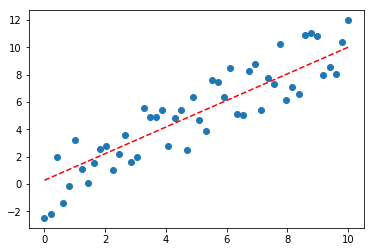

In [53]:
# Plotting the test data and the model
fig = None
fig = plt.scatter(X_test, y_test)
fig = plt.plot(X_test, y_pred, 'r--')
fig = plt.show()

In [57]:
# Displaying the model parameters estimated by the model
print("slope:", model.coef_)
print("y-intercept:", model.intercept_)

slope: [0.97259888]
y-intercept: 0.2762294762255504


### Ridge regression
<a id='ridge'></a>

Ridge regression imposes a penalty on the size of the coefficients determined by minimizing the RSS (residual sum of squares), which tackles the problem of collinearity not handled by OLS above.

In [269]:
from sklearn.linear_model import Ridge

In [270]:
# Creating deviations from y = x
error_train = 5 * np.random.random(100) - 2.5
error_test = 5 * np.random.random(100) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 100)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [271]:
# Initializing the model
ridge_model = Ridge(alpha=0.5)

# Now let's fit our model to the training data
ridge_model.fit(X_train[:, np.newaxis], y_train)

# Predicting y from test data with trained model
y_ridge = ridge_model.predict(X_train[:, np.newaxis])

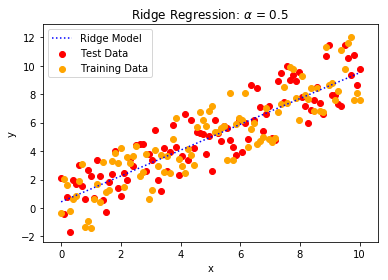

In [293]:
# Visualizing the differences between OLS and Ridge
fig = None
fig = plt.scatter(X_test, y_test, color='red', label='Test Data')
fig = plt.scatter(X_train, y_train, color='orange', label='Training Data')
fig = plt.plot(X_test, y_ridge, 'b:', label='Ridge Model')
fig = plt.xlabel('x')
fig = plt.ylabel('y')
fig = plt.title(r'Ridge Regression: $\alpha$ = 0.5')
fig = plt.legend()
fig = plt.show()

In [273]:
# Display model parameter estimates
print("Ridge slope:", ridge_model.coef_)
print("Ridge y-intercept", ridge_model.intercept_)

Ridge slope: [0.90759278]
Ridge y-intercept 0.4334555765630572


### Lasso
<a id='lasso'></a>

In [296]:
from sklearn.linear_model import Lasso

In [297]:
# Creating deviations from y = x
error_train = 5 * np.random.random(100) - 2.5
error_test = 5 * np.random.random(100) - 2.5

# Create data to train model
X_train = np.linspace(0, 10, 100)
y_train = X_train + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test + error_test

In [298]:
# Initializing the model
lasso_model = Lasso(alpha=0.1)

# Now let's fit our model to the training data
lasso_model.fit(X_train[:, np.newaxis], y_train)

# Predicting y from test data with trained model
y_lasso = lasso_model.predict(X_train[:, np.newaxis])

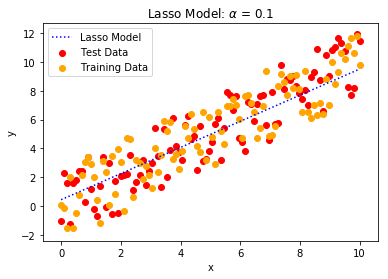

In [299]:
# Visualizing the model performance
fig = None
fig = plt.scatter(X_test, y_test, color='red', label='Test Data')
fig = plt.scatter(X_train, y_train, color='orange', label='Training Data')
fig = plt.plot(X_test, y_ridge, 'b:', label='Lasso Model')
fig = plt.xlabel('x')
fig = plt.ylabel('y')
fig = plt.title(r'Lasso Model: $\alpha$ = 0.1')
fig = plt.legend()
fig = plt.show()

In [300]:
# Displaying the estimated model parameters
print("Lasso slope:", lasso_model.coef_)
print("Lasso y-intercept", lasso_model.intercept_)

Lasso slope: [0.94958523]
Lasso y-intercept 0.4091349872425232


### Elastic net
<a id='elastic-net'></a>

In [330]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [331]:
# make training data for regression
X_train, y_train = make_regression(n_features=4, random_state=0)

In [332]:
# Initialize elastic net model
model = ElasticNet(random_state=0)

# Fitting model to training data
model.fit(X_train, y_train)

# Predicting y from trained model
y_pred = model.predict(X_train)

# Printing score
print('Model Accuracy:', model.score(X_train, y_train))

Model Accuracy: 0.8905284935984247


### Logistic regression
<a id='logistic'></a>

In [413]:
from sklearn.linear_model import LogisticRegression

In [456]:
# contrived example: simply classify numbers as positive or negative
X = np.array([(x-500) for x in range(1000)])
X = np.linspace(-500, 500, 50)
y = np.array([1 if x>= 0 else 0 for x in X])
df = pd.DataFrame(X, columns=list('X'))
df['y'] = y
# shuffle rows of the dataframe
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())

            X  y
0  -30.612245  0
1  -91.836735  0
2  153.061224  1
3 -295.918367  0
4  377.551020  1


In [457]:
# split data into training and test sets
X = df['X']
y = df['y']
X_train, y_train, X_test, y_test = X[:len(X)//2], y[:len(y)//2], X[len(X)//2:], y[len(y)//2:] 

In [458]:
# initialize logistic regression model
clf = LogisticRegression()

# fit model to training data
clf.fit(X_train[:, np.newaxis], y_train)

# use model to predict labels of test data
y_pred = clf.predict(X_test[:, np.newaxis])

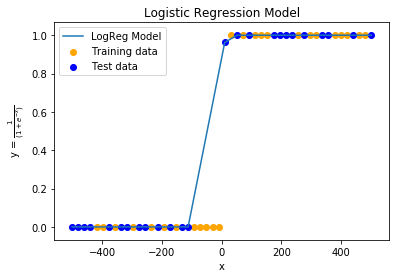

In [474]:
# define logit function for plot
logit = lambda x: 1 / (1 + np.exp(-x))

# get classifications via logit function
y_clf = logit(clf.coef_ * X_test[:, np.newaxis] + clf.intercept_)

# sort test data for plotting
df = pd.DataFrame(X_test, columns=list('X'))
df['y'] = y_clf
df = df.sort_values(by='X', axis=0)
X_test = df['X']
y_clf = df['y']

# visualize model results
fig = None
fig = plt.figure()
fig = plt.scatter(X_train, y_train, color='orange', label='Training data')
fig = plt.scatter(X_test, y_clf, color='blue', label='Test data')
fig = plt.plot(X_test, y_clf, label='LogReg Model')
fig = plt.title('Logistic Regression Model')
fig = plt.xlabel('x')
fig = plt.ylabel(r'y = $\frac{1}{(1 + e^{-x})}$')
fig = plt.legend()
fig = plt.show()

### Polynomial regression using basis functions
<a id='poly'></a>

In [503]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [504]:
# Creating deviations from y = x^2
error_train = 15 * np.random.random(50) - 7.5
error_test = 15 * np.random.random(50) - 7.5

# Create data to train model
X_train = np.linspace(0, 10, 50)
y_train = X_train**2 + error_train

# Create data to test model
X_test = X_train[:]
y_test = X_test**2 + error_test

In [505]:
# create a pipeline: transform input, apply linear regression model
pipe_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [506]:
# fit quadratic model to training data
pipe_model.fit(X_train[:, np.newaxis], y_train)

# predict y from trained model
y_poly = pipe_model.predict(X_test[:, np.newaxis])

# fit linear model to data
linear_model = LinearRegression()
linear_model.fit(X_train[:, np.newaxis], y_train)
y_ols = linear_model.predict(X_test[:, np.newaxis])

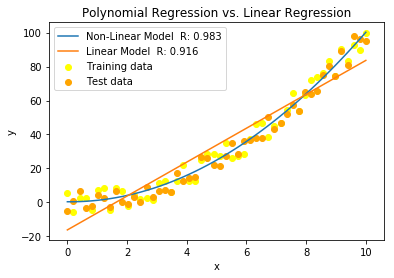

In [515]:
# visualize model results
fig = None
fig = plt.scatter(X_train, y_train, color='yellow', label='Training data')
fig = plt.scatter(X_test, y_test, color='orange', label='Test data')
fig = plt.plot(X_test, y_poly, label='Non-Linear Model  R:{0: .3f}'.format(r2_score(y_test, y_poly)))
fig = plt.plot(X_test, y_ols, label='Linear Model  R:{0: .3f}'.format(r2_score(y_test, y_ols)))
fig = plt.title('Polynomial Regression vs. Linear Regression')
fig = plt.xlabel('x')
fig = plt.ylabel('y')
fig = plt.legend()
fig = plt.show()